<h2><font color="#07bdf5">1.Import the necessary libraries</font></h2>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h2><font color="#07bdf5">1.Read and explore the given dataset. (Rename
column/add headers, plot histograms, find data
characteristics)</font></h2>

In [6]:
elec_df=pd.read_csv('ratings_Electronics.csv')

In [3]:
elec_df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


<font color='blue'>Observation: Found dataset with out column headers - Need to add header row</font>

In [7]:
#Adding Header
header=['user_id','product_id','rating','timestamp']

In [8]:
elec_df=pd.read_csv('ratings_Electronics.csv',names=header)

In [9]:
elec_df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


<font color="07bdf5" style="font-family:courier;font-size:24px;">Observation:DataFrame loaded with header</font>

<font color='blue'>Finding data characterstics</font>

In [10]:
elec_df.shape

(7824482, 4)

In [8]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [9]:
# Check for missing value
elec_df.isna().sum()

user_id       0
product_id    0
rating        0
timestamp     0
dtype: int64

### Observation: There is no missing values

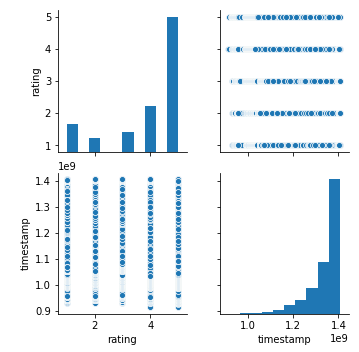

In [10]:
sns.pairplot(elec_df)

<h2><font color="#07bdf5">2.Take a subset of the dataset to make it less sparse/ denser.
( For example, keep the users only who has given 50 or
more number of ratings ) - (2.5 Marks)</font></h2>

# Count the number of unique users in the dataset

In [11]:
users = elec_df['user_id'].unique()
print('Found ',len(users),' unique users out of ',elec_df.shape[0], 'rating observations')

Found  4201696  unique users out of  7824482 rating observations


# Count the number of unique Electronic Items in the dataset

In [12]:
products = elec_df['product_id'].unique()
print('Found ',len(products),' unique Products out of ',elec_df.shape[0], 'rating for the products')

Found  476002  unique Products out of  7824482 rating for the products


# Creating Subset of the dataset

In [11]:
elec_grouped = elec_df.groupby(['user_id']).agg({'rating':'count'}).reset_index()
r50_elec_df = elec_grouped.sort_values(['rating', 'user_id'], ascending = [0,1])

In [12]:
r50_elec_df.shape

(4201696, 2)

In [15]:
r50_elec_df.head()

,user_id,rating
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406


In [13]:
sparse_elec_df = elec_df[elec_df.user_id.isin(r50_elec_df['user_id'])]

In [14]:
r50_elec_df = r50_elec_df[r50_elec_df['rating']>50]
r50_elec_df.rename(columns={'rating':'no_of_ratings'})

,user_id,no_of_ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406
755206,A1ODOGXEYECQQ8,380
2424036,A36K2N527TXXJN,314
1451394,A2AY4YUOX2N1BQ,311
4100926,AWPODHOB4GFWL,308
1277963,A25C2M3QF9G7OQ,296


In [18]:
sparse_elec_df.shape

(7824482, 4)

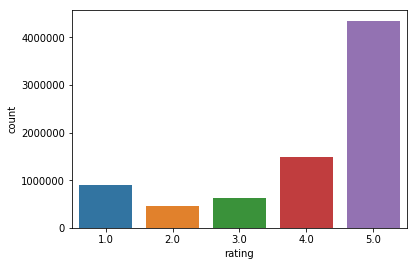

In [19]:
#plotting count of rating
sns.countplot(data=sparse_elec_df , x='rating')
plt.show()

In [20]:
sparse_elec_df.head(20)

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [21]:
#Unique products we are considering
products = sparse_elec_df['product_id'].unique()
print('After Sparse/Data subset, Found ',len(products),' unique Products out of ',sparse_elec_df.shape[0], 'rating for the products')

After Sparse/Data subset, Found  476002  unique Products out of  7824482 rating for the products


# Split the data randomly into train and test dataset. 
(Split it in 70/30 ratio)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_data, test_data = train_test_split(sparse_elec_df, test_size = 0.30, random_state=0)
print(train_data.head(5))

                user_id  product_id  rating   timestamp
5258360  A1H898ODS23YBE  B0060I17XA     5.0  1383696000
4191577  A3OATVQ0ZPA0O9  B004J3Y9U6     3.0  1398297600
5574835  A10F3XNIDFZK08  B0073HSHVM     3.0  1356652800
1619920   AOEAD7DPLZE53  B0012W7HQK     5.0  1247443200
424298   A2T5K3LO6TQMQW  B00022OBOM     4.0  1324857600


# Build Popularity Recommender model. (Non-personalised)

a. Count of user_id for each unique Electronic Product as recommendation score 

b. Sort the Electronic Products on recommendation score 

c. Get the top 5 recommendations

In [24]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('product_id').agg({'user_id': 'count'}).reset_index()
train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
train_data_grouped.head()

,product_id,score
0,0439886341,3
1,0511189877,4
2,0528881469,20
3,0558835155,1
4,059400232X,3


In [25]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'product_id'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,product_id,score,Rank
271590,B0074BW614,12730,1.0
375363,B00DR0PDNE,11499,2.0
287933,B007WTAJTO,9994,3.0
261254,B006GWO5WK,8567,4.0
91788,B0019EHU8G,8547,5.0


# Use popularity based recommender model to make predictions and find recommendations for random list of users with inferences

In [26]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [27]:
find_recom = ['AGVWTYW0ULXHT','ABXANRX4GPYRZ','A1E3OB6QMBKRYZ']   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: \n", str(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 
 AGVWTYW0ULXHT
               userID  product_id  score  Rank
271590  AGVWTYW0ULXHT  B0074BW614  12730   1.0
375363  AGVWTYW0ULXHT  B00DR0PDNE  11499   2.0
287933  AGVWTYW0ULXHT  B007WTAJTO   9994   3.0
261254  AGVWTYW0ULXHT  B006GWO5WK   8567   4.0
91788   AGVWTYW0ULXHT  B0019EHU8G   8547   5.0


Here is the recommendation for the userId: 
 ABXANRX4GPYRZ
               userID  product_id  score  Rank
271590  ABXANRX4GPYRZ  B0074BW614  12730   1.0
375363  ABXANRX4GPYRZ  B00DR0PDNE  11499   2.0
287933  ABXANRX4GPYRZ  B007WTAJTO   9994   3.0
261254  ABXANRX4GPYRZ  B006GWO5WK   8567   4.0
91788   ABXANRX4GPYRZ  B0019EHU8G   8547   5.0


Here is the recommendation for the userId: 
 A1E3OB6QMBKRYZ
                userID  product_id  score  Rank
271590  A1E3OB6QMBKRYZ  B0074BW614  12730   1.0
375363  A1E3OB6QMBKRYZ  B00DR0PDNE  11499   2.0
287933  A1E3OB6QMBKRYZ  B007WTAJTO   9994   3.0
261254  A1E3OB6QMBKRYZ  B006GWO5WK   8567   4.0
91788   A1E3OB

/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Since this is a popularity-based recommender model, recommendations remain the same for all users

We predict the products based on the popularity. It is not personalized to particular user

# Build Collaborative Filtering model.

In [28]:
elec_df.rating.unique()

array([5., 1., 3., 2., 4.])

In [29]:
counts1 = elec_df['user_id'].value_counts()
#print(counts1)
ratings_explicit = elec_df[elec_df['user_id'].isin(counts1[counts1 >= 100].index)]

In [30]:
ratings_explicit.head()

,user_id,product_id,rating,timestamp
118,AT09WGFUM934H,0594481813,3.0,1377907200
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
1777,A18S2VGUH9SCV5,1400501776,4.0,1340755200
2162,A5JLAU2ARJ0BO,1400532655,1.0,1291334400


In [31]:
ratings_explicit.shape

(44209, 4)

# Generate matrix table from explicit ratings table

In [32]:
#getting the pivot dataframe ratings_matrix
ratings_matrix = ratings_explicit.pivot(index='user_id', columns='product_id', values='rating').fillna(0)
userID = ratings_matrix.index
productID = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(289, 22635)


product_id,0594481813,0970407998,0972683275,1400501776,1400532655,1400599997,1400699169,1685560148,7562434166,787988002X,...,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y058K7B96C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10ZFE6YE0UHW8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


since NaNs cannot be handled by training algos, replacing these by 0, which indicates absence of ratings

# Generate the predicted ratings using SVD with no.of singular values to be 50

In [33]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50) #Finding three required matrices

In [34]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) # using A = U.S.Vt(VTranspose)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)

In [35]:
preds_df.head()

product_id,0594481813,0970407998,0972683275,1400501776,1400532655,1400599997,1400699169,1685560148,7562434166,787988002X,...,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.007273,0.001249,-0.024354,0.019858,0.007163,0.000739,0.012744,0.018462,0.005363,-0.003601,...,-0.055311,0.322925,-0.005588,-0.077080,-0.141806,-0.131544,0.013394,-0.198731,0.067938,0.001584
1,0.002485,-0.002452,0.057358,0.040406,-0.004640,0.000436,0.014649,0.013111,-0.000113,0.010802,...,0.006710,-0.105079,-0.009598,0.048149,0.026633,-0.012872,-0.029599,-0.022377,-0.034546,0.008466
2,0.000950,0.000487,0.119640,0.002175,0.000435,0.000086,-0.011196,0.014611,0.000064,-0.007642,...,-0.037576,0.235628,0.019401,-0.000993,0.103821,-0.040986,0.039064,0.084783,-0.038712,0.037797
3,-0.004321,-0.001464,0.105522,0.038826,-0.006237,-0.000095,-0.052618,-0.005630,0.005933,0.017571,...,-0.044521,0.123957,0.019767,0.044702,0.021392,-0.113093,0.015574,0.173706,-0.042632,-0.032504
4,0.008672,0.002921,0.079571,0.018170,-0.003324,0.000593,0.055773,0.017284,0.004907,0.015156,...,-0.055204,0.177769,0.001409,0.128439,0.052704,-0.059792,-0.016654,0.051093,-0.051577,-0.014446


In [36]:
# Recommend the items with the highest predicted ratings

def collab_recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

# Take a particular user_id

a. Lets find the recommendations for user with id A100WO06OQR8BQ

b. Get the predicted ratings for userID A100WO06OQR8BQ and sort them in descending order

c. Create a dataframe with name user_data containing userID A100WO06OQR8BQ explicitly interacted books

d. Combine the user_data and and corresponding electronics data in a single dataframe with name user_full_info

In [37]:
user_id = 2
userID = ratings_matrix.iloc[user_id-1, :].name
userID

'A100WO06OQR8BQ'

In [38]:
preds_df.shape

(289, 22635)

In [39]:
userID = 4
num_recommendations = 10
collab_recommend_items(userID, ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B0079UAT0A                  0.0          1.637455
B00829TIEK                  0.0          1.525930
B00HFRWWAM                  0.0          1.020028
B008X9Z528                  0.0          0.974535
B009NHWVIA                  0.0          0.951443
B0081FLFQE                  0.0          0.950439
B00AQRUW4Q                  0.0          0.948423
B003ES5ZUU                  0.0          0.945397
B00829TIA4                  0.0          0.919675
B00829THK0                  0.0          0.915920


/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [40]:
find_recom = [4,6,8]   # This list is user choice.
num_recommendations = 10
for i in find_recom:
    print("Here is the recommendation for the userId: \n", str(i))
    print(collab_recommend_items(i, ratings_matrix, preds_df, num_recommendations))    
    print("\n") 


/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


Here is the recommendation for the userId: 
 4

Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B0079UAT0A                  0.0          1.637455
B00829TIEK                  0.0          1.525930
B00HFRWWAM                  0.0          1.020028
B008X9Z528                  0.0          0.974535
B009NHWVIA                  0.0          0.951443
B0081FLFQE                  0.0          0.950439
B00AQRUW4Q                  0.0          0.948423
B003ES5ZUU                  0.0          0.945397
B00829TIA4                  0.0          0.919675
B00829THK0                  0.0          0.915920
None


Here is the recommendation for the userId: 
 6

Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
B0036Q7MV0                  0.0          0.105391
B000FOYMKU                  0.0    

/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()
/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


# Evaluation of Collabrative recommendation model


In [41]:
counts=elec_df.user_id.value_counts()
elec_df1_final=elec_df[elec_df.user_id.isin(counts[counts>=50].index)]
#constructing the pivot table
final_ratings_matrix = elec_df1_final.pivot(index = 'user_id', columns ='product_id', values = 'rating').fillna(0)
final_ratings_matrix.head()

product_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
preds_df.head()

product_id,0594481813,0970407998,0972683275,1400501776,1400532655,1400599997,1400699169,1685560148,7562434166,787988002X,...,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.007273,0.001249,-0.024354,0.019858,0.007163,0.000739,0.012744,0.018462,0.005363,-0.003601,...,-0.055311,0.322925,-0.005588,-0.077080,-0.141806,-0.131544,0.013394,-0.198731,0.067938,0.001584
1,0.002485,-0.002452,0.057358,0.040406,-0.004640,0.000436,0.014649,0.013111,-0.000113,0.010802,...,0.006710,-0.105079,-0.009598,0.048149,0.026633,-0.012872,-0.029599,-0.022377,-0.034546,0.008466
2,0.000950,0.000487,0.119640,0.002175,0.000435,0.000086,-0.011196,0.014611,0.000064,-0.007642,...,-0.037576,0.235628,0.019401,-0.000993,0.103821,-0.040986,0.039064,0.084783,-0.038712,0.037797
3,-0.004321,-0.001464,0.105522,0.038826,-0.006237,-0.000095,-0.052618,-0.005630,0.005933,0.017571,...,-0.044521,0.123957,0.019767,0.044702,0.021392,-0.113093,0.015574,0.173706,-0.042632,-0.032504
4,0.008672,0.002921,0.079571,0.018170,-0.003324,0.000593,0.055773,0.017284,0.004907,0.015156,...,-0.055204,0.177769,0.001409,0.128439,0.052704,-0.059792,-0.016654,0.051093,-0.051577,-0.014446


In [43]:
# Average PREDICTED rating for each item
preds_df.mean().head()

product_id
0594481813    0.003906
0970407998    0.008070
0972683275    0.028863
1400501776    0.013726
1400532655    0.007880
dtype: float64

In [44]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1).fillna(0)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


/Users/thiru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Avg_actual_ratings,Avg_predicted_ratings,item_index
0594451647,0.003247,0.000000,0
0594481813,0.001948,0.003906,1
0970407998,0.003247,0.008070,2
0972683275,0.012338,0.028863,3
1400501466,0.012987,0.000000,4


In [45]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.01997 



# Item - Item Collab Filtering

In [15]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split as ttsp

In [16]:
#pip install surprise

In [17]:
#trainset, testset = train_test_split(sparse_elec_df, test_size=.30)
# AttributeError: 'DataFrame' object has no attribute 'raw_ratings' - hence rename ratings column into raw_ratings
#sparse_elec_df.rename(columns={'rating':'raw_ratings'},inplace=True)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(sparse_elec_df[['user_id', 'product_id', 'rating']], reader)


trainset, testset = ttsp(data, test_size=.20)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...


In [ ]:
# run the trained model against the testset
test_pred = algo.test(testset)
test_pred

In [ ]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)